# AC 221: Critical Thinking in Data Science

## Problem Set 1, Part 2
**February 27, 2020**<br/>
**Harvard University**<br/>
**Spring 2020**<br/>

<hr style="height:2pt">

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

## Question 1

### Data Sources
#### US Census FactFinder
The distribution of age was calculated using US 2010 Decennial Census.

Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States: April 1, 2010 to July 1, 2018
Source: U.S. Census Bureau, Population Division
Release Date: June 2019 
Link: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

#### Microsoft Azure - Open Datasets
The distributions for zipcode, sex, and gender were calculated using Microsoft Azure's *US Population by Zipcode* Open Dataset, which in turn was sourced from the 2010 US Decennial Census. Because the census collects data only on sex and not gender, we used sex as a proxy for gender.

Link: https://azure.microsoft.com/en-us/services/open-datasets/catalog/us-decennial-census-zip/

### Age

In [2]:
age_df = pd.read_csv("data/census_age_0-100.csv")
age_2010 = age_df[['Age', '2010']][1:]

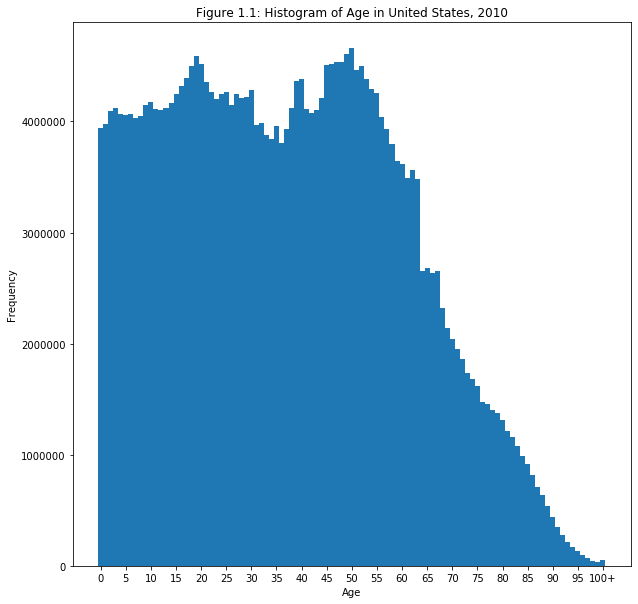

In [3]:
xticks = list(range(0, 100, 5))
xtick_labels = [str(x) for x in xticks]
xticks.append(100)
xtick_labels.append('100+')

plt.figure(figsize=(10,10))
plt.title("Figure 1.1: Histogram of Age in United States, 2010")
plt.bar(age_2010['Age'], age_2010['2010'], width = 1.0)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(xticks, xtick_labels)
plt.show()

As seen in **Figure 1.1**, age is not uniformly distributed in the United States. Instead, it has a bimodal, right skewed distribution. 

### Zip Code

In [4]:
population_df = pd.read_pickle('data/us_population_zip.pkl.gz')

In [5]:
# Remove rows with None's, which are aggregations of the more specific values.
pop = population_df.query('~(sex.isnull()) & (~race.isnull()) & ~(minAge.isna() | maxAge.isna())', engine='python')

Text(0.5, 0, 'Pop. Size')

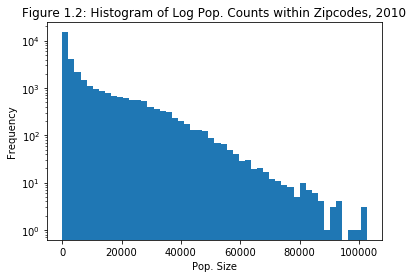

In [6]:
# Graph
ax = pop.groupby('zipCode')['population'].sum().plot.hist(bins=50, logy=True)
ax.set_title('Figure 1.2: Histogram of Log Pop. Counts within Zipcodes, 2010')
ax.set_xlabel('Pop. Size')

**Figure 1.2** shows that the population size within zipcodes is not uniformly distributed.

### Gender (By Proxy of Sex)

<ipython-input-7-f1c5113a7f21>:1: RuntimeWarning: invalid value encountered in long_scalars
  sex_ratios = pop.groupby(['zipCode']).apply((lambda g: g.query('sex == "Female"')['population'].sum()
<ipython-input-7-f1c5113a7f21>:1: RuntimeWarning: divide by zero encountered in long_scalars
  sex_ratios = pop.groupby(['zipCode']).apply((lambda g: g.query('sex == "Female"')['population'].sum()


Text(0.5, 1.0, 'Figure 1.3: Histogram of Female to Male Population Ratio by Zipcode, 2010')

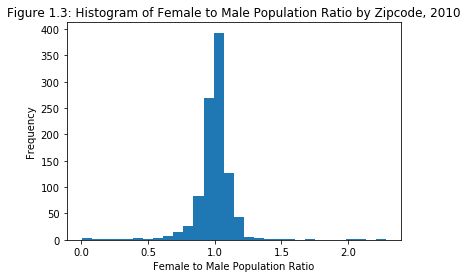

In [7]:
sex_ratios = pop.groupby(['zipCode']).apply((lambda g: g.query('sex == "Female"')['population'].sum()
                                       / g.query('sex == "Male"')['population'].sum()))
np.random.seed(1)
ax = sex_ratios.replace([np.inf, -np.inf], np.nan).dropna().sample(1000).plot.hist(bins=30)
ax.set_xlabel("Female to Male Population Ratio")
ax.set_title("Figure 1.3: Histogram of Female to Male Population Ratio by Zipcode, 2010")

**Figure 1.3** shows that the ratios of female to male vary dramatically between zipcodes, and so the gender ratio can be a strong quasi-identifier when linked with zipcode. 

### Race

Text(0, 0.5, 'Proportion of Total Population (log scale)')

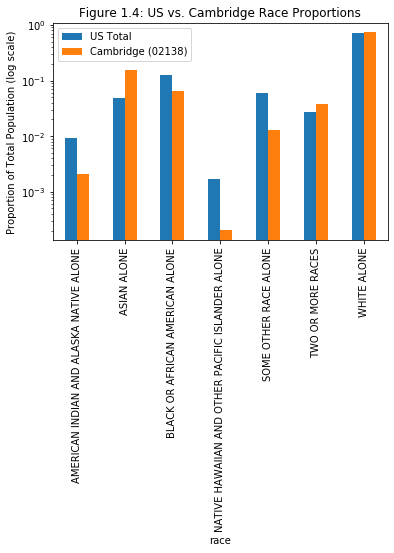

In [8]:
cambridge = pop.query('zipCode == "02138"')
ax = pd.DataFrame({
    'US Total': pop.groupby('race')['population'].sum() / 
                pop['population'].sum(),
    'Cambridge (02138)': cambridge.groupby('race')['population'].sum() / 
                         cambridge['population'].sum(),
}).plot.bar(logy=True)
ax.set_title('Figure 1.4: US vs. Cambridge Race Proportions')
ax.set_ylabel('Proportion of Total Population (log scale)')

**Figure 1.4** shows that races are not uniformly distributed across zipcodes. Certain zipcodes have different racial compositions from the general United States population, and so race can be a strong quasi-identifier when coupled with zipcode. 

### Takeaways

The actual non-uniform distributions of these feature mean that it becomes much easier to identify individuals just using these bits of data.

## General edX Data Processing

In [9]:
quasi = pd.read_csv('data/final_quasi-identifiers.csv')
quasi_list = list(quasi['variable'].values)

# Drop user_id from quasi_list
quasi_list.remove('user_id')

In [10]:
df = pd.read_csv('APCOMP221Pset1.csv').drop(['username', 'ip', 
                                             'un_major_region', 'un_economic_group', 
                                             'un_developing_nation', 'un_special_region',
                                             'latitude', 'longitude', 'profile_country'], axis=1)

/home/justin/miniconda3/envs/ac221/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (49,50,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Replacing NaNs

In [11]:
na_replacements = {
    'course_id': 'NA',
    'cc_by_ip': 'NA',
    'countryLabel': 'NA',
    'continent': 'NA',
    'city': 'NA',
    'region': 'NA',
    'subdivision': 'NA',
    'postalCode': 'NA',
    'LoE': 'NA',
    'YoB': -1,
    'gender': 'NA',
    'nforum_posts': 0,
    'nforum_votes': 0,
    'nforum_endorsed': 0,
    'nforum_threads': 0,
    'nforum_comments': 0,
    'nforum_pinned': 0,
    'nforum_events': 0,
    'mode': 'NA',
    'email_domain': 'NA'
}

df = df.fillna(na_replacements)

df.head()

,course_id,user_id,registered,viewed,explored,certified,completed,cc_by_ip,countryLabel,continent,...,roles_isInstructor,roles_isStaff,roles_isCCX,roles_isFinance,roles_isLibrary,roles_isSales,forumRoles_isAdmin,forumRoles_isCommunityTA,forumRoles_isModerator,forumRoles_isStudent
0,HarvardX/PH525.1x/1T2018,1488411,True,False,NaN,False,False,GB,United Kingdom,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,HarvardX/PH525.1x/1T2018,7013084,True,True,True,False,False,US,United States,Americas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,HarvardX/PH525.1x/1T2018,4083257,True,True,False,False,False,NA,NA,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,HarvardX/PH525.1x/1T2018,4605571,True,True,False,False,False,US,United States,North America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,HarvardX/PH525.1x/1T2018,1499820,True,True,True,False,False,HU,Hungary,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Problem 3

### Useful Functions

In [12]:
def suppress_below_k(k):
    groups = df.groupby(quasi_list).size()
    groups_below_threshold = groups[groups < k]
    return groups[groups < k]

def suppressed_n(groups):
    return groups_below_threshold.sum()

def percent_remaining(groups):
    return (1 - groups_below_threshold.sum() / df.shape[0]) * 100

def suppress_to_k_anonymize(df, quasi_ids, k):
    return df.groupby(quasi_ids).filter(lambda g: g.shape[0] >= k)

def status_count(df, status):
    return df.query(status + ' == True').shape[0]

def status_proportion(df, status):
    return status_count(df, status) / df.shape[0] * 100

def print_status_stats(df):
    print(f'Total students: {df.shape[0]}\n'
          f'Students explored: {status_count(df, "explored")}'
          f' - {status_proportion(df, "explored"):.2f}%\n'
          f'Students completed: {status_count(df, "completed")}'
          f' - {status_proportion(df, "completed"):.2f}%')

### Preliminary Check of User ID

In [13]:
### Checking if any user takes the same course more than once
sizes = df.groupby('user_id')['course_id'].size()
unique_sizes = df.groupby('user_id')['course_id'].nunique()
compare = (sizes == unique_sizes)
same_class = compare[compare == True]
same_class.value_counts()

True    936434
Name: course_id, dtype: int64

It does not appear that any user is taking the same class more than once, which implies that all $n$ records for the same quasi-identifier are from different users. 

### Raw Dataset Stats

In [14]:
print_status_stats(df)

Total students: 1141735
Students explored: 122258 - 10.71%
Students completed: 28142 - 2.46%


### 3-Anonymous Results

In [19]:
groups_below_threshold = suppress_below_k(3)

print("k = 3")
print("N suppresed: {}".format(suppressed_n(groups_below_threshold)))
print("Percent remaining: {:.2f}%".format(percent_remaining(groups_below_threshold)))

k = 3
N suppresed: 988191
Percent remaining: 13.45%


In [16]:
k3_df = suppress_to_k_anonymize(df, quasi_list, 3)
print_status_stats(k3_df)

Total students: 153544
Students explored: 5908 - 3.85%
Students completed: 296 - 0.19%


When making the quasi-identifier dataset k-anonymous using suppression for $k=3$, 988191 records are suppressed. This leaves **13.45%** of the 1141735 records in the original dataset. 

The completion rate is **0.19%**. The exploration rate is **3.85%**. 

### 4-Anonymous Results

In [22]:
# k = 4
groups_below_threshold = suppress_below_k(4)

print("k = 4")
print("N suppresed: {}".format(suppressed_n(groups_below_threshold)))
print("Percent remaining: {:.2f}%".format(percent_remaining(groups_below_threshold)))

k = 4
N suppresed: 1010127
Percent remaining: 11.53%


In [23]:
k4_df = suppress_to_k_anonymize(df, quasi_list, 4)
print_status_stats(k4_df)

Total students: 131608
Students explored: 4738 - 3.60%
Students completed: 198 - 0.15%


When making the quasi-identifier dataset k-anonymous using suppression for $k=4$, 1,010,127 records are suppressed. This leaves **11.53%** of the 1,141,735 records in the original dataset. 

The completion rate is **0.15%**. The exploration rate is **3.60%**.

### 5-Anonymous Results

In [24]:
# k = 5
groups_below_threshold = suppress_below_k(5)

print("k = 5")
print("N suppresed: {}".format(suppressed_n(groups_below_threshold)))
print("Percent remaining: {:.2f}%".format(percent_remaining(groups_below_threshold)))

k = 5
N suppresed: 1023587
Percent remaining: 10.35%


In [25]:
k5_df = suppress_to_k_anonymize(df, quasi_list, 5)
print_status_stats(k5_df)

Total students: 118148
Students explored: 4092 - 3.46%
Students completed: 159 - 0.13%


When making the quasi-identifier dataset k-anonymous using suppression for $k=4$, 1,023,587 records are suppressed. This leaves **10.35%** of the 1,141,735 records in the original dataset. 

The completion rate is **0.13%**. The exploration rate is **3.46%**.

## Question 4

### Useful Functions

In [83]:
def n_synthetic_required_for(k):
    groups = df.groupby(quasi_list).size()
    groups_below_threshold = groups[groups < k]
    return (k - groups_below_threshold).sum()

def suppressed_records(df, quasi_ids, k):
    return df.groupby(quasi_ids).filter(lambda g: g.shape[0] < k)

def free_ids(df, n):
    # Create list of unused IDs for synthetic records
    user_ids = df['user_id'].unique()
    user_ids.sort()

    range_ids = np.arange(1,10000001, 1)
    mask = np.isin(range_ids, user_ids, invert = True)
    free_ids = range_ids[mask]
    return random.choices(free_ids, k = n)

def marginal_variable_values(df, variable, n):
    # Create list of random values for desired variable using distribution from full dataset
    counts = df[variable].value_counts()
    return random.choices(counts.index.values, weights=counts.values, k=n)

def variables_for_synthetic(variables):
    # Create list of all variables in synthetic dataset: only care about quasi-identifiers, user_id, completed, and explored
    suppressed_vars = quasi_list.copy()
    for var in variables:
        suppressed_vars.append(var)
    return suppressed_vars

def suppressed_multi_index(df, quasi_identifiers, k):
    # Get multi-index
    groups = df.groupby(quasi_identifiers).size()
    return groups[groups < k]

def split_df(df, variables_for_synthetic, quasi_identifiers, k):
    # Split dataframe into suppressed and non-suppressed records
    suppressed_df = suppressed_records(df[variables_for_synthetic], quasi_identifiers, k)
    nonsuppressed_df = suppress_to_k_anonymize(df[variables_for_synthetic], quasi_identifiers, k)
    return suppressed_df, nonsuppressed_df
    
def generate_synthetic_values(df, k):
    # Random lists
    synth_n = n_synthetic_required_for(k)
    random_user_ids = free_ids(df, synth_n)
    random_completed = marginal_variable_values(df, 'completed', synth_n)
    random_explored = marginal_variable_values(df, 'explored', synth_n)
    return {
        'user_ids': random_user_ids,
        'completed': random_completed,
        'explored': random_explored
    }

def get_groups_needing_additions(df, sup_df, quasi_identifiers, k):
    # Indices setup for synthetic loop
    groups_below_threshold = suppressed_multi_index(df, quasi_identifiers, k)
    return tuple(zip(groups_below_threshold, groups_below_threshold.index))

def prep_synthetic_df(df, non_quasi_variables, quasi_identifiers, k):
    synth_values = generate_synthetic_values(df, k)
    all_synth_vars = variables_for_synthetic(non_quasi_variables)
    sup_df, nonsup_df = split_df(df, all_synth_vars, quasi_identifiers, k)
    groups_needing_additions = get_groups_needing_additions(df, sup_df, 
                                                            quasi_identifiers, k)
    return (sup_df, nonsup_df, groups_needing_additions, synth_values, k)

def synthetic_df(sup_df, nonsup_df, groups_needing_additions, synth_values, k):
    
    # Loop for creating synthetic records
    new_rows = []
    for t in tqdm(groups_needing_additions):
        t_size = t[0]
 
        # Add synthetic records
        for s in range(0, k-t_size):
            # Create synthetic variables
            user_id = synth_values['user_ids'][s]
            completed = synth_values['completed'][s]
            explored = synth_values['explored'][s]

            # Create row
            row = list(t[1])
            row.extend([user_id, completed, explored])
            new_rows.append(row)
    
    sup_df = sup_df.append(pd.DataFrame(new_rows), ignore_index=True)
    
    # Concat suppressed (with added synthetic rows) and non-suppressed dataframes
    synth_df = nonsup_df.append(sup_df)
    
    # Randomize row order 
    return synth_df.sample(frac=1).reset_index(drop=True)

### Creating Synthetic Rows for Database
For every record whose quasi-identifiers appeared in  $n$ < $k$ records, we generated $k - n$ synthetic records.

As we are only concerned with comparing `completed` and `explored` rates, we only included these variables in addition to the quasi-identifiers and `user_id`. 

A fake `user_id` was created by randomly selecting a n unused number in the range [1, 1000000]. This was the range of numbers for real ids. This means all synthetic records represent users who did not take more than one class. Ideally, we would sample user_ids in a way that distribution of number of classes taken by a user. 

The values for `explored` and `completed` were drawn using the marginal distribution. Thus, they were each independently drawn according to the distribution of the corresponding column in the original dataset. Because our two variables are binary categories, the distributions were Bernoulli with proportions of success easy to calculate. The marginal distribution was chosen because it gives a good mean vs correlation bias trade-off while not being as computationally expensive as using the marginal mean distribution.

### 3-Anonymous Results

In [81]:
synth_k3_df_prep = prep_synthetic_df(df, ['user_id', 'completed', 'explored'], quasi_list, 3)
synth_k3_df = synthetic_df_2(*synth_k3_df_prep)
print_status_stats(synth_k3_df)


Total students: 3038191
Students explored: 122258 - 4.02%
Students completed: 28142 - 0.93%


In [50]:
print("Synthetic records needed: {}".format(n_synthetic_required_for(3)))

Synthetic records needed: 1896456


### 4-Anonymous Results

In [84]:
synth_k4_df_prep = prep_synthetic_df(df, ['user_id', 'completed', 'explored'], quasi_list, 4)
synth_k4_df = synthetic_df(*synth_k4_df_prep)
print_status_stats(synth_k4_df)


Total students: 4007052
Students explored: 122258 - 3.05%
Students completed: 28142 - 0.70%


In [52]:
print("Synthetic records needed: {}".format(n_synthetic_required_for(4)))

Synthetic records needed: 2865317


### 5-Anonymous Results

In [85]:
synth_k5_df_prep = prep_synthetic_df(df, ['user_id', 'completed', 'explored'], quasi_list, 5)
synth_k5_df = synthetic_df(*synth_k5_df_prep)
print_status_stats(synth_k5_df)


Total students: 4979278
Students explored: 122258 - 2.46%
Students completed: 28142 - 0.57%


In [86]:
print("Synthetic records needed: {}".format(n_synthetic_required_for(5)))

Synthetic records needed: 3837543


## Question 5

We've decided to do generalization on each of the quasi-identifiers first, and then suppress any additional records that need it. This isn't a particularly sophisticated technique, and it's certainly not the optimization that was performed in Angiuli and Waldo's "Statistical Tradeoffs ...". We decided to both blur and generalize the forum activity variables. Blurring allowed us to keep a more nuanced measure to differentiate overall activity for active users, while generalization allowed us to keep some measure of diversity in activities. 

Here are the generalization strategies we're using:
  * Drop `cc_by_ip` as it's largely redundant with `countryLabel`
  * Starting with the most specific, set any geographic field with fewer than 5000 records to "NA"
  * Change `YoB` to `birth_decade` which is the first three digits of the year
  * Blur all the `nforum` variables together by summing them into a `nforum_actions` variable
  * Change all the `nforum` varibles to booleans indicating whether they are greater than zero
  * Change `email_domain` to only the first three letters
  * Change `LoE` to `attended_college`; a boolean indicating if the student went to college
  
Changing the names of some of these attributes means we need a new set of quasi-identifiers to work from:

In [111]:
GENERALIZED_QUASI_IDS = [
    'postalCode',
    'city',
    'subdivision',
    'region',
    'countryLabel',
    'continent',
    'email_domain',
    'course_id',
    'mode',
    'gender',
    'nforum_actions',
    'nforum_posts_>0',
    'nforum_votes_>0',
    'nforum_endorsed_>0',
    'nforum_threads_>0',
    'nforum_comments_>0',
    'nforum_pinned_>0',
    'nforum_events_>0',
    'birth_decade',
    'attended_college'
]

### Useful Functions

Here we write all our functions for generalization, blurring, suppression, and presentation of results.

In [112]:
def generalize_geo(df, min_per_geo=5000):
    g = df.copy()
    GEO_HIERARCHY = [
        'postalCode',
        'city',
        'subdivision',
        'region',
        'countryLabel',
        'continent']
    g = g.drop('cc_by_ip', axis=1)
    for field in GEO_HIERARCHY:
        value_counts = g[field].value_counts()
        values_to_drop = set(value_counts[value_counts < min_per_geo].index.values)
        g.loc[g[field].isin(values_to_drop), field] = na_replacements[field]
    return g

In [113]:
def generalize_education(df):
    g = df.copy()
    # Associate is sometimes not included as college, but we are including it.
    college_levels = set(['p', 'p_se', 'p_oth', 'm', 'b', 'a'])
    g['attended_college'] = g['LoE'].isin(college_levels)
    return g.drop('LoE', axis=1)

In [114]:
def generalize_birth_year(df):
    g = df.copy()
    g['birth_decade'] = df['YoB'].apply(lambda y: str(y)[:3] + '*' if y>-1 else 'NA')
    return g.drop('YoB', axis=1)

In [115]:
def blur_forum_actions(df):
    g = df.copy()
    g['nforum_actions'] = (g['nforum_posts'] + g['nforum_votes'] + 
                          g['nforum_endorsed'] + g['nforum_threads'] + g['nforum_comments'] + 
                          g['nforum_pinned'] + g['nforum_events'])
    return g

In [116]:
def generalize_forum_actions(df):
    g = df.copy()
    fields = ['nforum_posts',
        'nforum_votes',
        'nforum_endorsed',
        'nforum_threads',
        'nforum_comments',
        'nforum_pinned',
        'nforum_events']
    for field in fields:
        g[field + '_>0'] = g[field] > 0
        g = g.drop(field, axis=1)
    return g

In [117]:
def generalize_email_domains(df):
    g = df.copy()
    g['email_domain'] = g['email_domain'].apply(lambda e: e[:3] + '*')
    return g

In [118]:
def generalize_df(df):
    return generalize_geo(
        generalize_birth_year(
        generalize_education(
        generalize_email_domains(
        generalize_forum_actions(
        blur_forum_actions(df))))))

In [119]:
def suppress_to_k_anonymize(df, quasi_ids, k):
    return df.groupby(quasi_ids).filter(lambda g: g.shape[0] >= k)

In [120]:
def status_count(df, status):
    return df.query(status + ' == True').shape[0]

def status_proportion(df, status):
    return status_count(df, status) / df.shape[0] * 100

def print_status_stats(df):
    print(f'Total students: {df.shape[0]}\n'
          f'Students explored: {status_count(df, "explored")}'
          f' - {status_proportion(df, "explored"):.2f}%\n'
          f'Students completed: {status_count(df, "completed")}'
          f' - {status_proportion(df, "completed"):.2f}%')

### Raw Dataset Stats

In [121]:
print_status_stats(df)

Total students: 1141735
Students explored: 122258 - 10.71%
Students completed: 28142 - 2.46%


### 3-Anonymous Results

In [122]:
generalized = generalize_df(df)

In [123]:
k3_df = suppress_to_k_anonymize(generalized, GENERALIZED_QUASI_IDS, 3)

In [124]:
print_status_stats(k3_df)

Total students: 586987
Students explored: 38164 - 6.50%
Students completed: 3137 - 0.53%


### 4-Anonymous Results

In [125]:
k4_df = suppress_to_k_anonymize(generalized, GENERALIZED_QUASI_IDS, 4)

In [126]:
print_status_stats(k4_df)

Total students: 525322
Students explored: 32557 - 6.20%
Students completed: 2457 - 0.47%


### 5-Anonymous Results

In [127]:
k5_df = suppress_to_k_anonymize(generalized, GENERALIZED_QUASI_IDS, 5)

In [128]:
print_status_stats(k5_df)

Total students: 482694
Students explored: 28828 - 5.97%
Students completed: 2034 - 0.42%


### Observations

We can see that there's a steep dropoff in the number and proportion of students that completed and explored the class between the raw dataset and the 3-anonymous set. Specifically, in the raw data 2.46% of students completed, whereas in the 3-anonymous dataset, only 0.53% of students completed. As we increase the level of k-anonymity, there are fewer students overall and the proportion of students that completed and explored continues to drop off. This demonstrates that making a dataset k-anonymous may seriously impact the statistical validity of the dataset.

If we compare the 3-anonymous dataset that was generated using just suppression to the dataset that uses suppression, generalization and blurring to achieve 3-anonymity, we see that these strategies allow us to keep more than 400K more students in the database. By keeping these additional students, we reduce the bias in the `completed` percentage. In the suppressed dataset, only **0.19%** completed their course, while **0.53%** completed in this dataset. The pattern holds for 4- and 5-anonymity.

Overall, the process of de-identification contains multiple trade-offs that must be balanced. Specifically, the more private the dataset, the more skewed certain summary statistics become. The choices made about how to generalize, blur, and suppress records have drastic impacts on the accuarcy of these summary statistics. These choices will have even more impact when the transformed variables are used within the analysis. For example, we only looked at overall completion and exploration rates, but choices about generalizing locations would have potentially affected any analys of completion and exploration rates by 

## Question 6

After reviewing all the field, we believe the following could be sensitive: `completed`, `grade`, `nproblem_check`, `nshow_answer`, `cert_status`. To check for the l-diversity, we're taking the minimum number of unique values per field for each quasi-identifier group.

In [129]:
def calc_l_diversity(df, field):
    return df.groupby(GENERALIZED_QUASI_IDS).apply(lambda g: g[field].nunique(dropna=False)).min()

In [130]:
sensitive_fields = ['completed', 'grade', 'nproblem_check', 'nshow_answer', 'cert_status']
k3_l_diversity = {field: calc_l_diversity(k3_df, field) for field in sensitive_fields}
k4_l_diversity = {field: calc_l_diversity(k4_df, field) for field in sensitive_fields}
k5_l_diversity = {field: calc_l_diversity(k5_df, field) for field in sensitive_fields}

### 3-Anonymous l-diversity Results

In [131]:
k3_l_diversity

{'completed': 1,
 'grade': 1,
 'nproblem_check': 1,
 'nshow_answer': 1,
 'cert_status': 1}

### 4-Anonymous l-diversity Results

In [132]:
k4_l_diversity

{'completed': 1,
 'grade': 1,
 'nproblem_check': 1,
 'nshow_answer': 1,
 'cert_status': 1}

### 5-Anonymous l-diversity Results

In [133]:
k5_l_diversity

{'completed': 1,
 'grade': 1,
 'nproblem_check': 1,
 'nshow_answer': 1,
 'cert_status': 1}

### Observations

From the above results, we can see that after all our work, none of our datasets rise above 1-diversity for any of the fields we consider sensitive. The improve this, we would need to either consider suppressing entire quasi-identifier columns or creating synthetic records to add diversity to each quasi-identifier group.